In [5]:

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (120, 120, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
# Adding a second convolutional layer

classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 218, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('G:/dl project/fruit',
                                                 target_size = (120, 120),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('G:/dl project/fruit',
                                            target_size = (120, 120),
                                            batch_size = 32,
                                            class_mode = 'categorical')

model = classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 8,
                         validation_data = test_set,    
                         validation_steps = 4)

classifier.save("modelmulticlassi_fruit.h5")
print("Saved model to disk")

# Part 3 - Making new predictions






Found 155 images belonging to 4 classes.
Found 155 images belonging to 4 classes.
Epoch 1/8
5/5 [==============================] - 34s 7s/step - loss: 1.4465 - accuracy: 0.4774 - val_loss: 1.0423 - val_accuracy: 0.5469
Epoch 2/8
5/5 [==============================] - 32s 6s/step - loss: 0.9357 - accuracy: 0.5871 - val_loss: 0.4979 - val_accuracy: 0.7317
Epoch 3/8
5/5 [==============================] - 32s 6s/step - loss: 0.6733 - accuracy: 0.7226 - val_loss: 0.5979 - val_accuracy: 0.7398
Epoch 4/8
5/5 [==============================] - 32s 6s/step - loss: 0.5146 - accuracy: 0.8129 - val_loss: 0.5568 - val_accuracy: 0.7480
Epoch 5/8
5/5 [==============================] - 36s 7s/step - loss: 0.5109 - accuracy: 0.7806 - val_loss: 0.2242 - val_accuracy: 0.9187
Epoch 6/8
5/5 [==============================] - 35s 7s/step - loss: 0.2900 - accuracy: 0.8968 - val_loss: 0.1615 - val_accuracy: 0.9531
Epoch 7/8
5/5 [==============================] - 35s 7s/step - loss: 0.1388 - accuracy: 0.9613 -

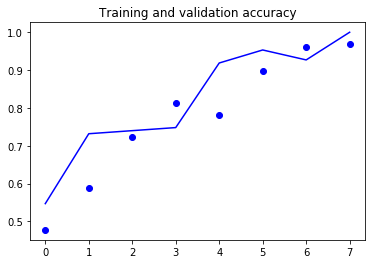

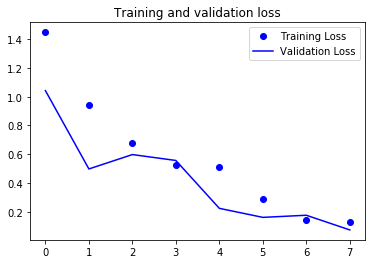

In [6]:

import matplotlib.pyplot as plt
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [10]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image





import numpy as np
from keras.preprocessing import image

# load model
model = load_model('modelmulticlassi_fruit.h5')
test_image = image.load_img('G:/dl project/fruit/mango/mango11.jpg', target_size = (120, 120))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'apple'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'carrot'
    print(prediction)
    
elif result[0][2] == 1:
    prediction = 'husky'
    print(prediction)
   
    
else:
    result[0][3] == 1
    prediction = 'mango'
    print(prediction)


mango
